In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.models import ColumnDataSource, HoverTool, BoxAnnotation
from bokeh.models.tools import * 
from bokeh.plotting import figure

from bokeh.transform import factor_cmap, CategoricalColorMapper
from bokeh.palettes import Category20


Loading BokehJS ...

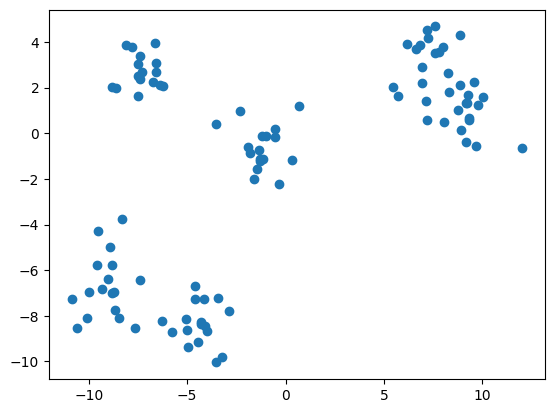

In [105]:

#X,y = datasets.make_moons(n_samples=100, random_state = 42, noise = 0.1 )
X,y = datasets.make_blobs(n_samples=100, centers = 6, random_state =45  )

plt.scatter (X[:,0], X[:,1])
plt.show()

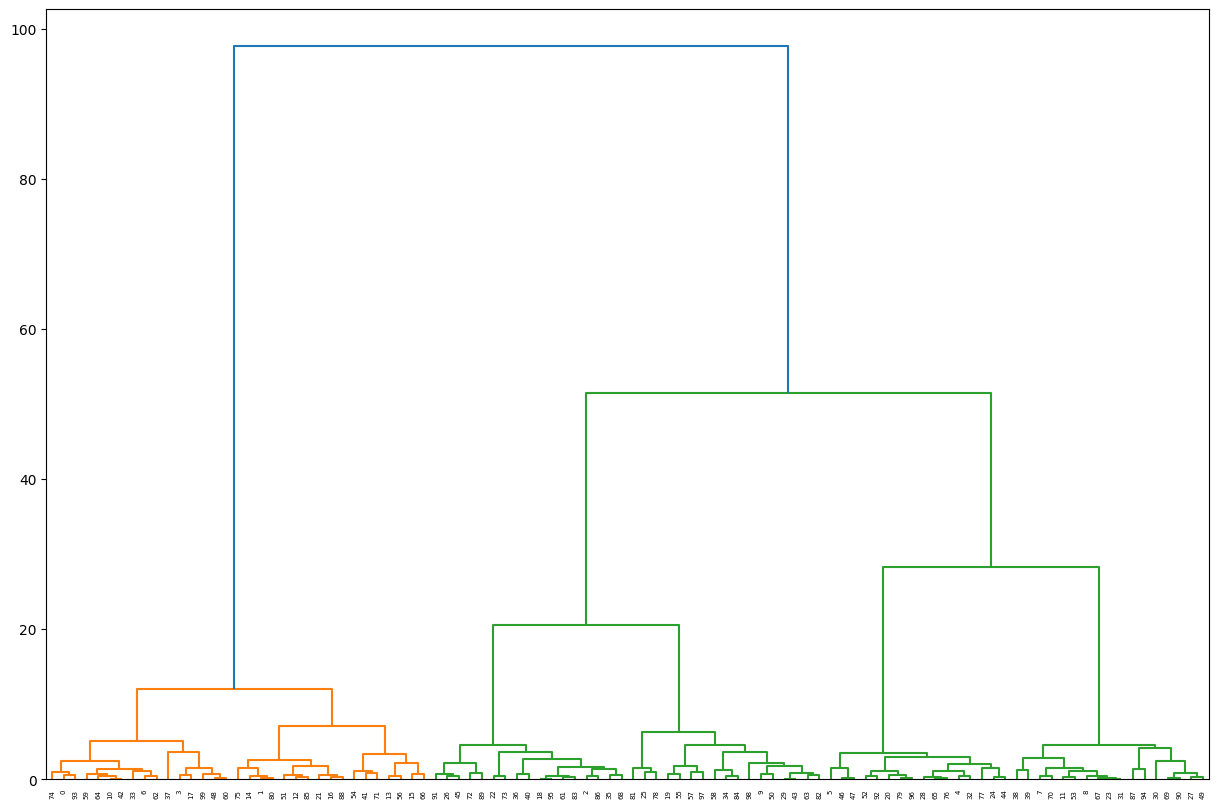

In [107]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd
 

# Реализация иерархической кластеризации при помощи функции linkage

mergings = linkage(X, method='ward')
 
# Строим дендрограмму, указав параметры удобные для отображения

plt.figure(figsize=(15, 10))
dendrogram(mergings)
plt.show()
 


In [108]:
T = fcluster(mergings,10, 'distance') # distance or maxclust
print (T)

[1 2 3 1 5 5 1 6 6 4 1 6 2 2 2 2 2 1 3 4 5 2 3 6 5 4 3 6 5 4 6 6 5 1 4 3 3
 1 6 6 3 2 1 4 5 3 5 5 1 6 4 2 5 6 2 4 2 4 4 1 1 3 1 4 1 5 2 6 3 6 6 2 3 3
 1 2 5 5 4 5 2 4 4 3 4 2 3 6 2 3 6 3 5 1 6 3 5 4 4 1]


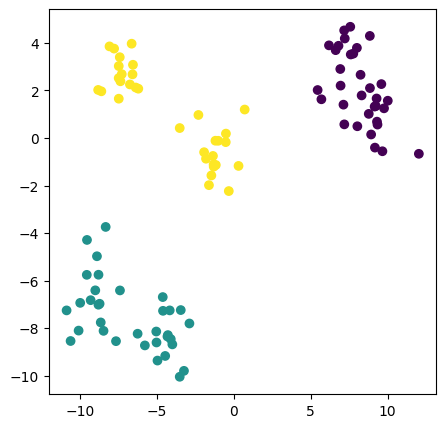

In [86]:
plt.figure(figsize=(5, 5))
plt.scatter (X[:,0], X[:,1], c=T)
plt.show()


In [87]:
def update_cluster_centers(X, c, num_clusters):
    for cl in range(1, num_clusters+1):
            ix = np.where(c==cl)
            mu[cl-1,:] = np.mean(X[ix,:], axis=1)
    return mu

In [88]:
num_clusters = len(set(T))
mu = np.zeros([num_clusters,2])
mu = update_cluster_centers(X, T, num_clusters)
print(mu)

[[ 8.20412426  2.061867  ]
 [-6.74804529 -7.51382813]
 [-4.16045299  1.00683372]]


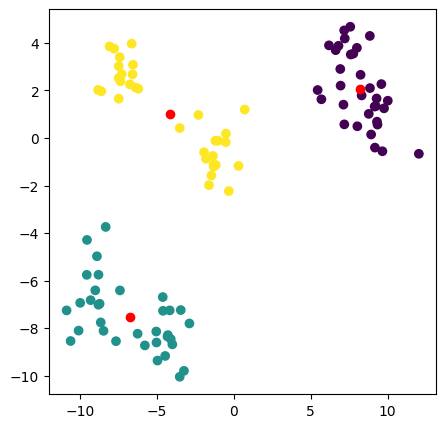

In [89]:
plt.figure(figsize = (5,5))
plt.scatter (X[:,0], X[:,1], c=T)
plt.scatter(mu[:,0],mu[:,1], c = 'red', marker = 'o')
plt.show()

## Bokeh plots

In [90]:
data_df =pd.DataFrame({'x' : X[:,0], 
             'y' : X[:,1], 
             'cluster' : T})
data_df['cluster']=data_df['cluster'].astype('str')

In [91]:
palette = Category20[len(data_df['cluster'].unique())]
color_map = CategoricalColorMapper(factors=data_df['cluster'].unique(),
                                   palette=palette)

In [92]:
p=figure(sizing_mode="stretch_width", max_width=1800, height=500, title = 'Clustering')
source = ColumnDataSource(data_df)
p.scatter(source=source, x='x', y='y',color={'field': 'cluster', 'transform': color_map}, width = 3)
p.scatter(mu[:,0],mu[:,1], color = 'red', width = 5)

p.add_tools(HoverTool(tooltips=[("x", "@x"), ("y", "@y"), ("cluster", "@cluster")]))

show(p)

# Сумма квадратов расстояний до центроида

In [93]:
#Сумма квадратов расстояний до центроида

cluster_dist=0
for j in range(0, np.shape(mu)[0]):
    summ = 0
    obj = np.where(T==j+1)
    for i in range(0, np.shape(obj)[1]):
        #print(euclidean_distances(mu[j].reshape(1,-1), X[obj[0][i],:].reshape(1,-1)))
        summ = summ + (euclidean_distances(mu[j].reshape(1,-1), X[obj[0][i],:].reshape(1,-1)))**2
    if(summ>0):
        summ = summ
    cluster_dist = cluster_dist + summ
    print(j,' custer dist: ', summ)
print ("Summary of squared cluster dist: ", cluster_dist)

print ("Mean summary of squared cluster dist: ", cluster_dist / np.shape(mu)[0])



0  custer dist:  [[140.52532826]]
1  custer dist:  [[284.50246387]]
2  custer dist:  [[445.8365626]]
Summary of squared cluster dist:  [[870.86435472]]
Mean summary of squared cluster dist:  [[290.28811824]]


# K-means

In [94]:
from sklearn.cluster import KMeans

In [95]:
model = KMeans(n_clusters=4, n_init=10)
model.fit(X)
all_predictions = model.predict(X)
print (all_predictions)

[1 1 0 1 2 2 1 3 3 0 1 3 1 1 1 1 1 1 0 0 2 1 0 3 2 0 0 3 2 0 3 3 2 1 0 0 0
 1 3 3 0 1 1 0 2 0 2 2 1 3 0 1 2 3 1 0 1 0 0 1 1 0 1 0 1 2 1 3 0 3 3 1 0 0
 1 1 2 2 0 2 1 0 0 0 0 1 0 3 1 0 3 0 2 1 3 0 2 0 0 1]


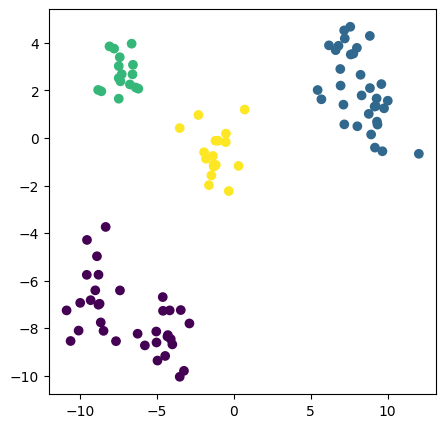

In [96]:
plt.figure(figsize = (5,5))
plt.scatter (X[:,0], X[:,1], c=all_predictions)
plt.show()

In [97]:
print('Sum of squared distances of samples to their closest cluster center.:', model.inertia_)

Sum of squared distances of samples to their closest cluster center.: 472.08573606137327


In [98]:
inertia = []
silhouette = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10).fit(X)
    inertia.append((kmeans.inertia_))
    all_predictions = kmeans.predict(X)
    silhouette.append(silhouette_score(X, all_predictions))
print (inertia)

[2194.619727635032, 870.8643547241178, 472.08573606137327, 259.5795564009951, 176.1282308577753, 153.70943167635176, 143.24864846484422, 125.24089654012067]


<function matplotlib.pyplot.show(close=None, block=None)>

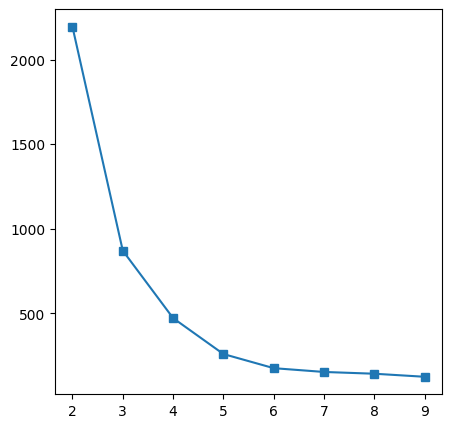

In [99]:
plt.figure(figsize=(5,5))
plt.plot(range (2,10), inertia, marker='s')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

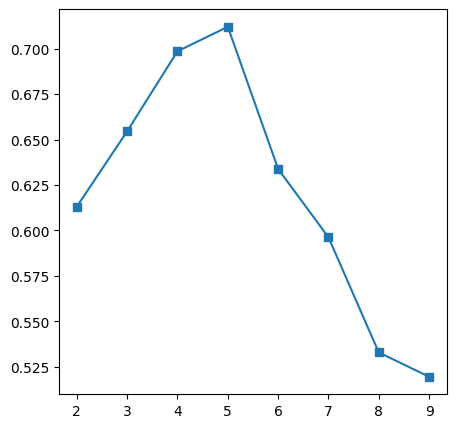

In [100]:
plt.figure(figsize=(5,5))
plt.plot(range (2,10), silhouette, marker='s')

plt.show

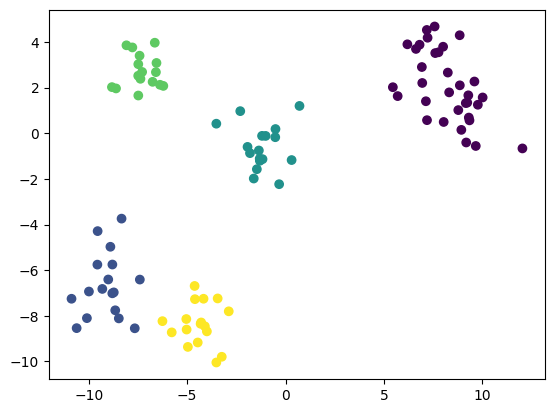

In [101]:
kmeans = KMeans(n_clusters=5, random_state=1, n_init=10).fit(X)
plt.scatter (X[:,0], X[:,1], c=kmeans.predict(X))
plt.show()

## DBSCAN

In [102]:
from sklearn.cluster import DBSCAN

In [103]:
#db = DBSCAN(eps=0.3, min_samples=7).fit(X)  # параметры для make_moons 
db = DBSCAN(eps=1.2, min_samples=6).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
labels

Estimated number of clusters: 5
Estimated number of noise points: 21


array([ 0,  0,  1,  0,  2,  2,  0,  3,  3,  4,  0,  3,  0, -1,  0,  0,  0,
        0,  1,  4,  2,  0, -1,  3,  2, -1,  1,  3,  2,  4, -1,  3,  2,  0,
        4,  1,  1, -1, -1, -1, -1, -1,  0,  4,  2,  1, -1,  2,  0,  3,  4,
        0,  2,  3,  0, -1, -1,  4, -1,  0,  0,  1,  0,  4,  0,  2,  0,  3,
        1,  3,  3, -1, -1, -1,  0,  0,  2,  2, -1,  2,  0, -1,  4,  1,  4,
        0,  1, -1,  0,  1,  3,  1,  2,  0, -1,  1,  2,  4, -1,  0],
      dtype=int64)

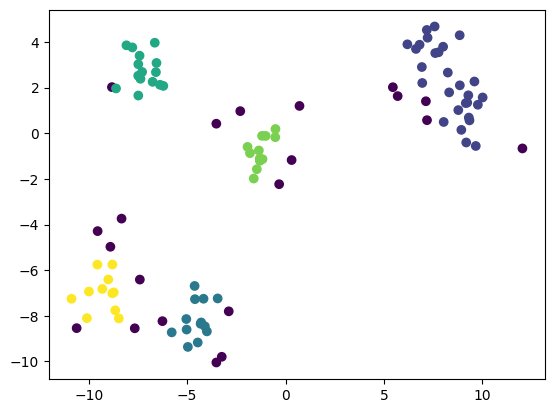

In [104]:
plt.scatter (X[:,0], X[:,1], c=labels)
plt.show()